# 3. Decision Tree

In [4]:
import numpy as np
import pandas as pd
import sklearn
import pickle
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve,auc

In [6]:
# loading Vectors

In [ ]:
# bow vectors

In [8]:
X_train_bow = pickle.load(open('bow_vectors/X_train_bow','rb'))
X_test_bow = pickle.load(open('bow_vectors/X_test_bow','rb'))
bow_features = pickle.load(open('bow_vectors/bow_features','rb'))
y_train = np.load('split dataset/y_train.npy',allow_pickle = True)
y_test = np.load('split dataset/y_test.npy',allow_pickle = True)

## 1. BoW (bag of Words)

Model with best parameters :
 {'max_depth': 50, 'min_samples_split': 500}


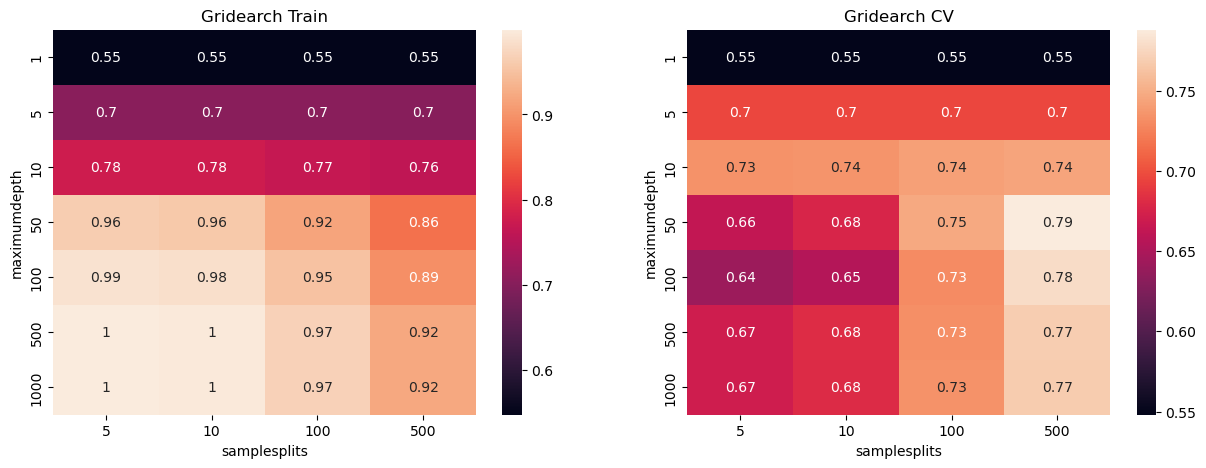

In [15]:
dtr = DecisionTreeClassifier()
samplesplits = [5, 10, 100, 500]
maximumdepth = [1, 5, 10, 50, 100, 500, 1000]
parameters = {'min_samples_split':samplesplits ,'max_depth':maximumdepth}
model = GridSearchCV(estimator=dtr, param_grid=parameters, cv=3, n_jobs=-1, scoring='roc_auc',return_train_score=True)
model.fit(X_train_bow,y_train)
print("Model with best parameters :\n",model.best_params_)
train_auc = model.cv_results_['mean_train_score'].reshape(7,4)
cv_auc = model.cv_results_['mean_test_score'].reshape(7,4)

f, axes = plt.subplots(1, 2,figsize=(15,5))

for i in range(2):
  title = train_auc if i == 0 else cv_auc
  sns.heatmap(title,xticklabels=samplesplits,yticklabels=maximumdepth,annot=True,ax=axes[i])
  axes[i].set_title(f"Gridearch {'Train' if i==0 else 'CV'}")
  axes[i].set_ylabel("maximumdepth")
  axes[i].set_xlabel("samplesplits")


plt.show()

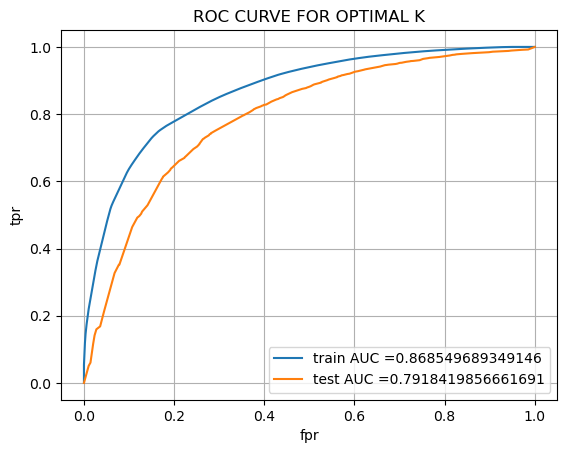

Area under train roc 0.868549689349146
Area under test roc 0.7918419856661691


In [21]:
dtr_bp = DecisionTreeClassifier(max_depth = 50, min_samples_split = 500)
dtr_bp = dtr_bp.fit(X_train_bow,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, dtr_bp.predict_proba(X_train_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, dtr_bp.predict_proba(X_test_bow)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))


In [23]:
from sklearn.metrics import confusion_matrix
# confusion matrix
def confusion_matrixes(model, X_train, y_train, X_test, y_test):
    train_cm = confusion_matrix(y_train,model.predict(X_train))
    test_cm = confusion_matrix(y_test, model.predict(X_test))
    col_n = ['Negitive','Positive']
    df_train = pd.DataFrame(train_cm,index = col_n, columns= col_n)
    df_test = pd.DataFrame(test_cm,index = col_n, columns= col_n)
    f, axes = plt.subplots(1,2,figsize= (12,4))

    for i in range(2):
        df = df_train if i == 0 else df_test
        sns.heatmap(df,annot = True, cmap = 'inferno', ax = axes[i], fmt = 'd')
        axes[i].set_title(f"Confusion Matrix - {'Train' if i==0 else 'Test'}")
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("True Label")
    plt.show()

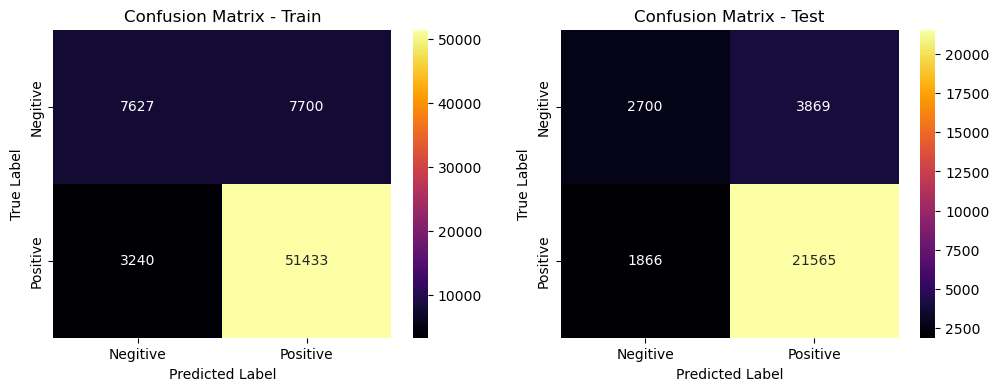

In [27]:
confusion_matrixes(dtr_bp, X_train_bow, y_train, X_test_bow, y_test)

# 2. TF-IDF

In [30]:
X_train_tfidf = pickle.load(open('tfidf_vectors/X_train_tfidf','rb'))
X_test_tfidf = pickle.load(open('tfidf_vectors/X_test_tfidf','rb'))
tfidf_features = pickle.load(open('tfidf_vectors/tfidf_features','rb'))

Model with best parameters :
 {'max_depth': 50, 'min_samples_split': 500}


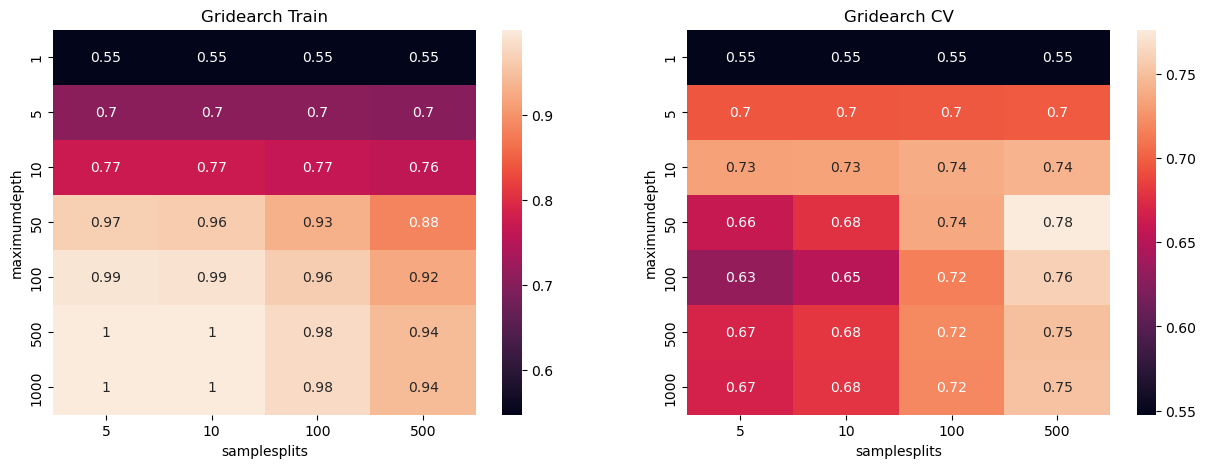

In [32]:
dtr2 = DecisionTreeClassifier()
samplesplits = [5, 10, 100, 500]
maximumdepth = [1, 5, 10, 50, 100, 500, 1000]
parameters = {'min_samples_split':samplesplits ,'max_depth':maximumdepth}
model = GridSearchCV(estimator=dtr2, param_grid=parameters, cv=3, n_jobs=-1, scoring='roc_auc',return_train_score=True)
model.fit(X_train_tfidf,y_train)
print("Model with best parameters :\n",model.best_params_)
train_auc = model.cv_results_['mean_train_score'].reshape(7,4)
cv_auc = model.cv_results_['mean_test_score'].reshape(7,4)

f, axes = plt.subplots(1, 2,figsize=(15,5))

for i in range(2):
  title = train_auc if i == 0 else cv_auc
  sns.heatmap(title,xticklabels=samplesplits,yticklabels=maximumdepth,annot=True,ax=axes[i])
  axes[i].set_title(f"Gridearch {'Train' if i==0 else 'CV'}")
  axes[i].set_ylabel("maximumdepth")
  axes[i].set_xlabel("samplesplits")


plt.show()

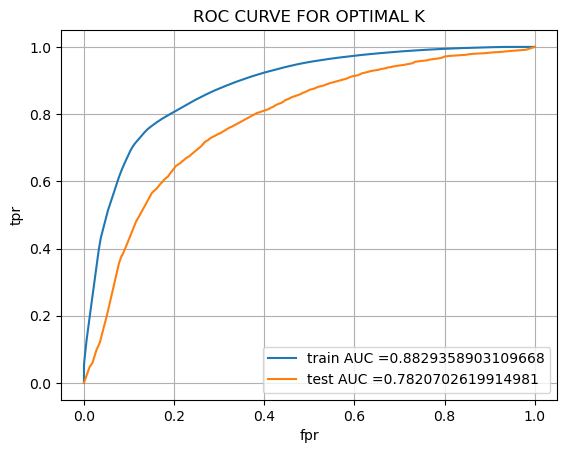

Area under train roc 0.8829358903109668
Area under test roc 0.7820702619914981


In [39]:
dtr_bp2 = DecisionTreeClassifier(max_depth = 50, min_samples_split = 500)
dtr_bp2 = dtr_bp2.fit(X_train_tfidf,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, dtr_bp2.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, dtr_bp2.predict_proba(X_test_tfidf)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))


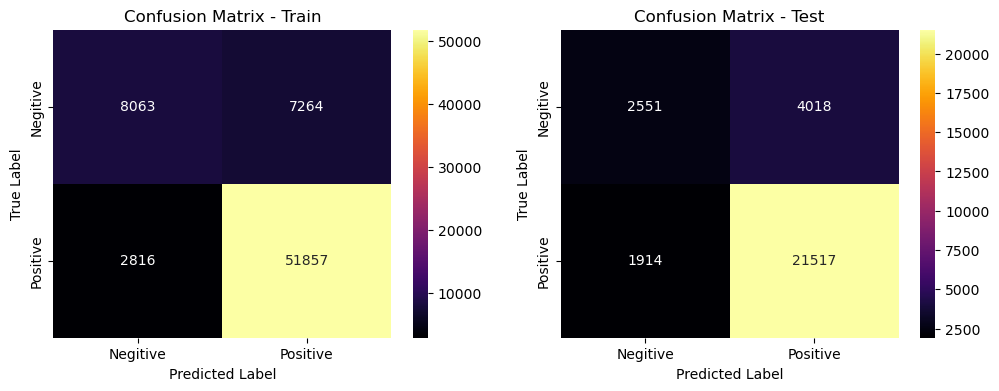

In [41]:
confusion_matrixes(dtr_bp2, X_train_tfidf, y_train, X_test_tfidf, y_test)

## 3. Average Word2Vector

In [44]:
X_train_avgw2v = pickle.load(open('w2v/avgw2v_train','rb'))
X_test_avgw2v = pickle.load(open('w2v/avgw2v_test','rb'))
w2v_words = pickle.load(open('w2v/w2v_words','rb'))

Model with best parameters :
 {'max_depth': 10, 'min_samples_split': 500}


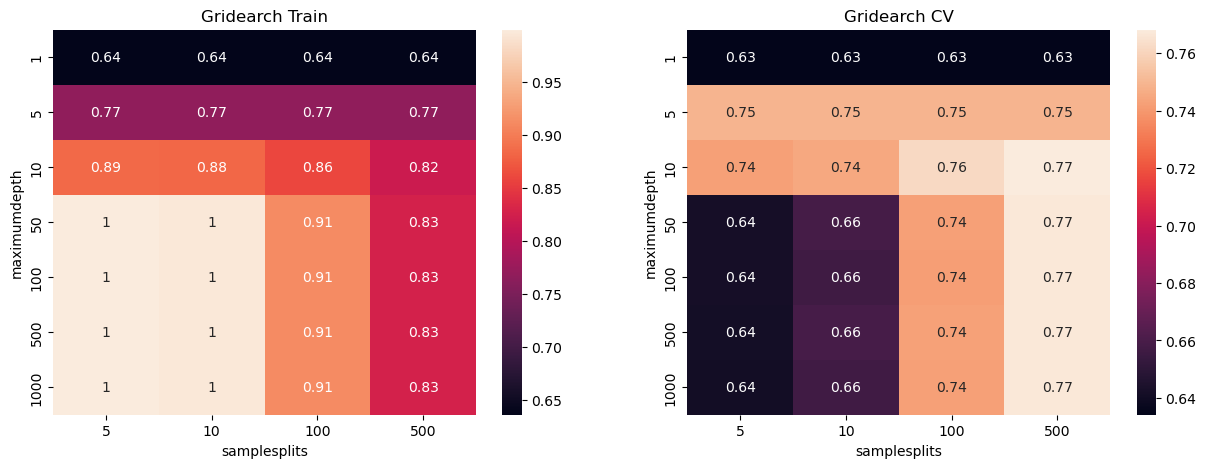

In [46]:
dtr3 = DecisionTreeClassifier()
samplesplits = [5, 10, 100, 500]
maximumdepth = [1, 5, 10, 50, 100, 500, 1000]
parameters = {'min_samples_split':samplesplits ,'max_depth':maximumdepth}
model = GridSearchCV(estimator=clf, param_grid=parameters, cv=3, n_jobs=-1, scoring='roc_auc',return_train_score=True)
model.fit(X_train_avgw2v,y_train)
print("Model with best parameters :\n",model.best_params_)
train_auc = model.cv_results_['mean_train_score'].reshape(7,4)
cv_auc = model.cv_results_['mean_test_score'].reshape(7,4)

f, axes = plt.subplots(1, 2,figsize=(15,5))

for i in range(2):
  title = train_auc if i == 0 else cv_auc
  sns.heatmap(title,xticklabels=samplesplits,yticklabels=maximumdepth,annot=True,ax=axes[i])
  axes[i].set_title(f"Gridearch {'Train' if i==0 else 'CV'}")
  axes[i].set_ylabel("maximumdepth")
  axes[i].set_xlabel("samplesplits")


plt.show()

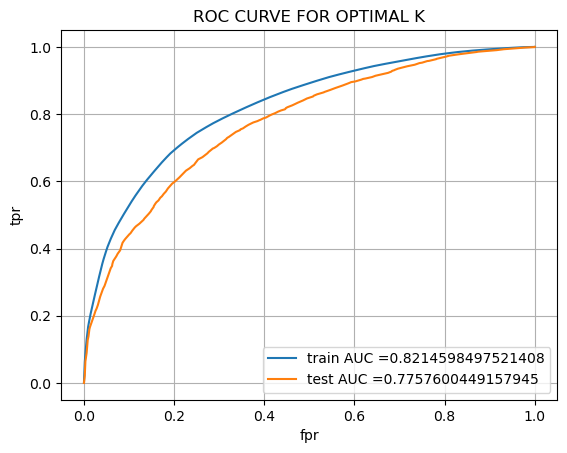

Area under train roc 0.8214598497521408
Area under test roc 0.7757600449157945


In [50]:
dtr_bp3 = DecisionTreeClassifier(**model.best_params_)
dtr_bp3 = dtr_bp3.fit(X_train_avgw2v,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, dtr_bp3.predict_proba(X_train_avgw2v)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, dtr_bp3.predict_proba(X_test_avgw2v)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))


### Observation

In [55]:
from prettytable import PrettyTable

In [57]:
z = PrettyTable()

z.field_names = ["Vector","Algorithm","Hyperparam-min_sample_splits","Hyperparam-max_Depth","Train AUC", "Test AUC"]
z.add_row(["bow","decision_tree",500,50, 0.86,0.79])
z.add_row(["tfidf","decision_tree",500,50,0.88, 0.78 ])
z.add_row(["avgw2v","decision_tree",500,10, 0.82,0.77])
print(z)


+--------+---------------+------------------------------+----------------------+-----------+----------+
| Vector |   Algorithm   | Hyperparam-min_sample_splits | Hyperparam-max_Depth | Train AUC | Test AUC |
+--------+---------------+------------------------------+----------------------+-----------+----------+
|  bow   | decision_tree |             500              |          50          |    0.86   |   0.79   |
| tfidf  | decision_tree |             500              |          50          |    0.88   |   0.78   |
| avgw2v | decision_tree |             500              |          10          |    0.82   |   0.77   |
+--------+---------------+------------------------------+----------------------+-----------+----------+


# we can see that all are performing same 